**Use this code to make `CHILL+_results.csv`**

In [49]:
import os
import csv

# Set the directory where your text files are stored
chillplus_dir = "CHILL+"

# Define the output CSV file name
output_csv = "CHILL+_results.csv"

# Initialize an empty list to store the extracted data
data = []

# Get the sorted list of filenames as integers
sorted_filenames = sorted(
    (int(f[:-4]) for f in os.listdir(chillplus_dir) if f.endswith(".txt"))
)

# Loop through the sorted filenames
for frame_number in sorted_filenames:
    filename = f"{frame_number}.txt"
    file_path = os.path.join(chillplus_dir, filename)

    with open(file_path, "r") as file:
        lines = file.readlines()

        # Extract the header line
        header_line = lines[0].strip()

        # Split the header line into attribute names
        attribute_names = header_line.split()

        # Prepare the CSV header by removing double quotes
        header = [attr.replace('"', '') for attr in attribute_names]

        # Find the line with the relevant data (starts with a number)
        for line in lines:
            if line.strip() and line.strip()[0].isdigit():
                # Split the line by spaces and convert the values to integers
                values = list(map(int, line.strip().split()))

                # Add the frame number to the beginning of the values list
                values.insert(0, frame_number)

                # Add the data to the list
                data.append(values)
                break

# Write the data to a CSV file
with open(output_csv, "w", newline="") as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(header)
    csv_writer.writerows(data)

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
import sys

# Read the data from the CSV file
data = pd.read_csv("CHILL+_results.csv")

# Add a column for the time in ns. Note that it is the column that divided the `frame` column by 10
data['time'] = data['Frame']/10

In [58]:
# In this code block, we will find the time when the hydrate count is maximum. And then, reset the time to zero at that point. 

# Find the maximum hydrate count
max_hydrate_count = data['ChillPlus.counts.HYDRATE'].max()

# Find the time when the hydrate count is maximum
max_hydrate_time = data.loc[data['ChillPlus.counts.HYDRATE'] == max_hydrate_count, 'time'].iloc[0]

# Reset the time to zero at the point when the hydrate count is maximum
data['time'] = data['time'] - max_hydrate_time

# Delete the rows if time < 0
data = data[data['time'] >= 0]

In [64]:
data.head(20)

,#,ChillPlus.counts.HYDRATE,Frame,ChillPlus.counts.HEXAGONAL_ICE,ChillPlus.counts.INTERFACIAL_HYDRATE,ChillPlus.counts.INTERFACIAL_ICE,time,ChillPlus.changes.HYDRATE,ChillPlus.changes.HEXAGONAL_ICE,ChillPlus.changes.INTERFACIAL_HYDRATE,ChillPlus.changes.INTERFACIAL_ICE
50,50,5362,50,134531,1393,3313,0.0,0,0,0,0
51,51,5248,51,133709,1334,3677,0.1,-114,-822,-59,364
52,52,5180,52,133156,1334,3903,0.2,-182,-1375,-59,590
53,53,5123,53,132940,1364,3925,0.3,-239,-1591,-29,612
54,54,5010,54,132471,1378,4105,0.4,-352,-2060,-15,792
55,55,5031,55,132754,1317,3945,0.5,-331,-1777,-76,632
56,56,4987,56,132585,1298,4060,0.6,-375,-1946,-95,747
57,57,4952,57,132646,1352,3906,0.7,-410,-1885,-41,593
58,58,4993,58,132323,1350,4116,0.8,-369,-2208,-43,803
59,59,4976,59,132162,1341,4134,0.9,-386,-2369,-52,821


In [60]:
# Rcparams settings
rcParams['font.family'] = 'sans-serif'

# Check whether Arial or SF Pro Display are installed in the computer
try:
    rcParams['font.sans-serif'] = ['SF Pro Display']
except:
    try:
        rcParams['font.sans-serif'] = ['Arial']
    except:
        print("ERROR Note that Arial and SF Pro are not installed in the computer. The program will use the default font.")
        pass

# Label should be far away from the axes
rcParams['axes.labelpad'] = 8
rcParams['xtick.major.pad'] = 7
rcParams['ytick.major.pad'] = 7

# Add minor ticks
rcParams['xtick.minor.visible'] = True
rcParams['ytick.minor.visible'] = True

# Tick width
rcParams['xtick.major.width'] = 1
rcParams['ytick.major.width'] = 1
rcParams['xtick.minor.width'] = 0.5
rcParams['ytick.minor.width'] = 0.5

# Tick length
rcParams['xtick.major.size'] = 5
rcParams['ytick.major.size'] = 5
rcParams['xtick.minor.size'] = 3
rcParams['ytick.minor.size'] = 3

# Tick color
rcParams['xtick.color'] = 'black'
rcParams['ytick.color'] = 'black'

rcParams['font.size'] = 14
rcParams['axes.titlepad'] = 10
rcParams['axes.titleweight'] = 'bold'
rcParams['axes.titlesize'] = 18

# Axes settings
rcParams['axes.labelweight'] = 'bold'
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['axes.labelsize'] = 16
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'

# Legend font settings
rcParams['legend.fontsize'] = 11
rcParams['legend.title_fontsize'] = 12
rcParams['legend.frameon'] = True

**Absolute counts from CHILL+ analyses**

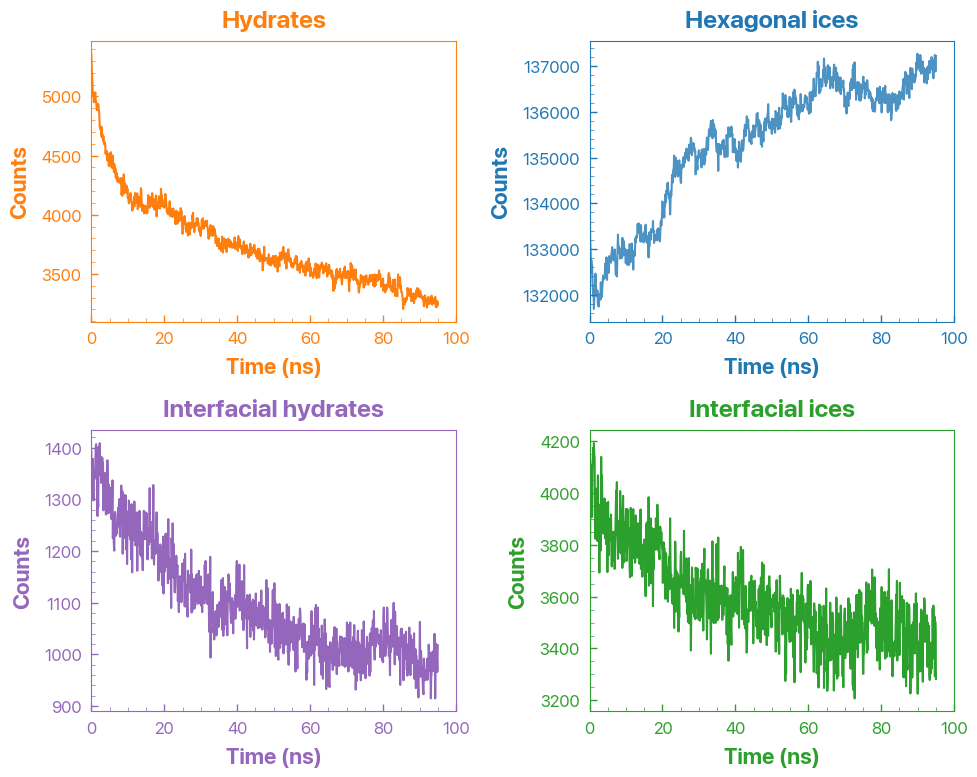

In [61]:
# `Frame` is the x data. 
# y1 = `ChillPlus.counts.HYDRATE`
# y2 = `ChillPlus.counts.HEXAGONAL_ICE`
# y3 = `ChillPlus.counts.INTERFACIAL_HYDRATE`
# y4 = `ChillPlus.counts.INTERFACIAL_ICE`

# And all the other columns are y data. 
# Let's plot them in each subplots. 

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot the data
axes[0, 0].plot(data['time'], data['ChillPlus.counts.HYDRATE'], label='$N_{Hydrate}$', color='tab:orange')

axes[0, 1].plot(data['time'], data['ChillPlus.counts.HEXAGONAL_ICE'], label='HEXAGONAL_ICE', color='tab:blue', alpha=0.8)

axes[1, 0].plot(data['time'], data['ChillPlus.counts.INTERFACIAL_HYDRATE'], label='INTERFACIAL_HYDRATE', color='tab:purple')

axes[1, 1].plot(data['time'], data['ChillPlus.counts.INTERFACIAL_ICE'], label='INTERFACIAL_ICE', color='tab:green')


# Set the title
axes[0, 0].set_title('Hydrates', color = 'tab:orange')
axes[0, 1].set_title('Hexagonal ices', color = 'tab:blue')
axes[1, 0].set_title('Interfacial hydrates', color = 'tab:purple')
axes[1, 1].set_title('Interfacial ices', color = 'tab:green')

# Set the x label
axes[0, 0].set_xlabel('Time (ns)', color = 'tab:orange')
axes[0, 1].set_xlabel('Time (ns)', color = 'tab:blue')
axes[1, 0].set_xlabel('Time (ns)', color = 'tab:purple')
axes[1, 1].set_xlabel('Time (ns)', color = 'tab:green')

# Set the y label
axes[0, 0].set_ylabel('Counts', color = 'tab:orange')
axes[0, 1].set_ylabel('Counts', color = 'tab:blue')
axes[1, 0].set_ylabel('Counts', color = 'tab:purple')
axes[1, 1].set_ylabel('Counts', color = 'tab:green')

# Set the frame color
axes[0, 0].spines['bottom'].set_color('tab:orange')
axes[0, 0].spines['top'].set_color('tab:orange')
axes[0, 0].spines['left'].set_color('tab:orange')
axes[0, 0].spines['right'].set_color('tab:orange')

axes[0, 1].spines['bottom'].set_color('tab:blue')
axes[0, 1].spines['top'].set_color('tab:blue')
axes[0, 1].spines['left'].set_color('tab:blue')
axes[0, 1].spines['right'].set_color('tab:blue')

axes[1, 0].spines['bottom'].set_color('tab:purple')
axes[1, 0].spines['top'].set_color('tab:purple')
axes[1, 0].spines['left'].set_color('tab:purple')
axes[1, 0].spines['right'].set_color('tab:purple')

axes[1, 1].spines['bottom'].set_color('tab:green')
axes[1, 1].spines['top'].set_color('tab:green')
axes[1, 1].spines['left'].set_color('tab:green')
axes[1, 1].spines['right'].set_color('tab:green')

# Tick color changing
axes[0, 0].tick_params(axis='x', colors='tab:orange')
axes[0, 0].tick_params(axis='y', colors='tab:orange')

axes[0, 1].tick_params(axis='x', colors='tab:blue')
axes[0, 1].tick_params(axis='y', colors='tab:blue')

axes[1, 0].tick_params(axis='x', colors='tab:purple')
axes[1, 0].tick_params(axis='y', colors='tab:purple')

axes[1, 1].tick_params(axis='x', colors='tab:green')
axes[1, 1].tick_params(axis='y', colors='tab:green')

# Minor tick color changing
axes[0, 0].tick_params(axis='x', which='minor', colors='tab:orange')
axes[0, 0].tick_params(axis='y', which='minor', colors='tab:orange')

axes[0, 1].tick_params(axis='x', which='minor', colors='tab:blue')
axes[0, 1].tick_params(axis='y', which='minor', colors='tab:blue')

axes[1, 0].tick_params(axis='x', which='minor', colors='tab:purple')
axes[1, 0].tick_params(axis='y', which='minor', colors='tab:purple')

axes[1, 1].tick_params(axis='x', which='minor', colors='tab:green')
axes[1, 1].tick_params(axis='y', which='minor', colors='tab:green')


# Set the x limit
axes[0, 0].set_xlim(0, 100)
axes[0, 1].set_xlim(0, 100)
axes[1, 0].set_xlim(0, 100)
axes[1, 1].set_xlim(0, 100)

plt.tight_layout()
plt.savefig('ChillPlus_counts.png', dpi=300)

**Absolute counts changes from CHILL+ results**

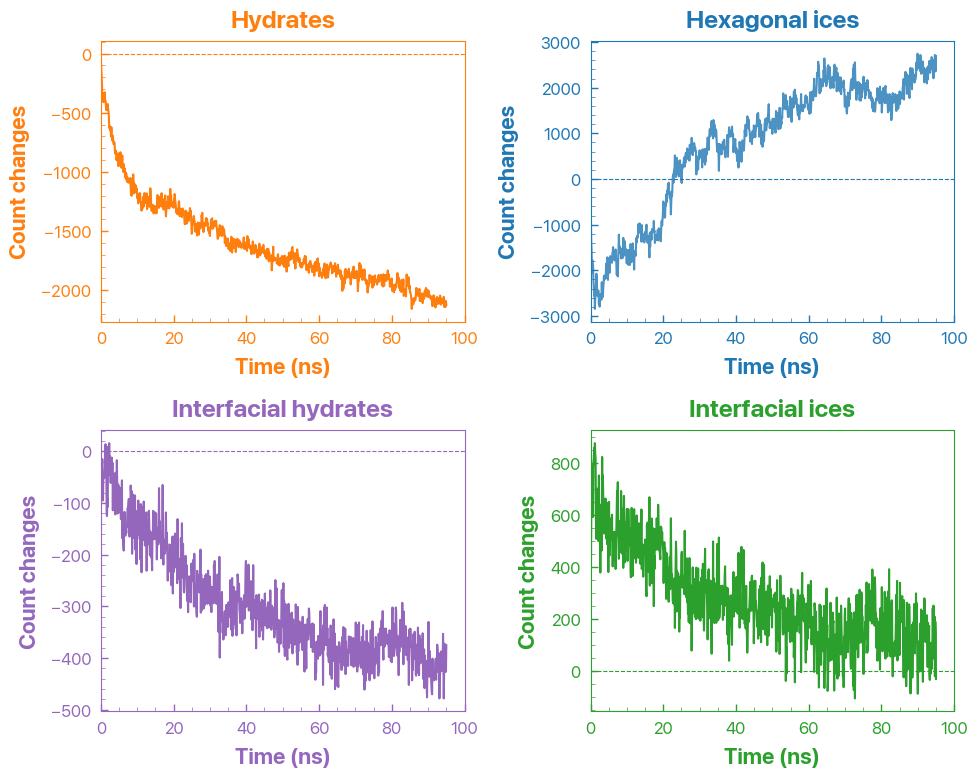

In [66]:
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Compute the count changes from the initial value
data['ChillPlus.changes.HYDRATE'] = data['ChillPlus.counts.HYDRATE'] - data['ChillPlus.counts.HYDRATE'].iloc[0]

## Since the row truncated, the HEXAGONAL_ICE count is the same as the first row
data['ChillPlus.changes.HEXAGONAL_ICE'] = data['ChillPlus.counts.HEXAGONAL_ICE'] - data['ChillPlus.counts.HEXAGONAL_ICE'].iloc[0]
data['ChillPlus.changes.INTERFACIAL_HYDRATE'] = data['ChillPlus.counts.INTERFACIAL_HYDRATE'] - data['ChillPlus.counts.INTERFACIAL_HYDRATE'].iloc[0]
data['ChillPlus.changes.INTERFACIAL_ICE'] = data['ChillPlus.counts.INTERFACIAL_ICE'] - data['ChillPlus.counts.INTERFACIAL_ICE'].iloc[0]

# Replace the original plots with the count change plots
axes[0, 0].plot(data['time'], data['ChillPlus.changes.HYDRATE'], label='$N_{Hydrate}$', color='tab:orange')
axes[0, 1].plot(data['time'], data['ChillPlus.changes.HEXAGONAL_ICE'], label='HEXAGONAL_ICE', color='tab:blue', alpha=0.8)
axes[1, 0].plot(data['time'], data['ChillPlus.changes.INTERFACIAL_HYDRATE'], label='INTERFACIAL_HYDRATE', color='tab:purple')
axes[1, 1].plot(data['time'], data['ChillPlus.changes.INTERFACIAL_ICE'], label='INTERFACIAL_ICE', color='tab:green')

# Update y labels to indicate count differences
axes[0, 0].set_ylabel('Count changes', color='tab:orange')
axes[0, 1].set_ylabel('Count changes', color='tab:blue')
axes[1, 0].set_ylabel('Count changes', color='tab:purple')
axes[1, 1].set_ylabel('Count changes', color='tab:green')

# Set the title
axes[0, 0].set_title('Hydrates', color = 'tab:orange')
axes[0, 1].set_title('Hexagonal ices', color = 'tab:blue')
axes[1, 0].set_title('Interfacial hydrates', color = 'tab:purple')
axes[1, 1].set_title('Interfacial ices', color = 'tab:green')

# Set the x label
axes[0, 0].set_xlabel('Time (ns)', color = 'tab:orange')
axes[0, 1].set_xlabel('Time (ns)', color = 'tab:blue')
axes[1, 0].set_xlabel('Time (ns)', color = 'tab:purple')
axes[1, 1].set_xlabel('Time (ns)', color = 'tab:green')

# Set the frame color
axes[0, 0].spines['bottom'].set_color('tab:orange')
axes[0, 0].spines['top'].set_color('tab:orange')
axes[0, 0].spines['left'].set_color('tab:orange')
axes[0, 0].spines['right'].set_color('tab:orange')

axes[0, 1].spines['bottom'].set_color('tab:blue')
axes[0, 1].spines['top'].set_color('tab:blue')
axes[0, 1].spines['left'].set_color('tab:blue')
axes[0, 1].spines['right'].set_color('tab:blue')

axes[1, 0].spines['bottom'].set_color('tab:purple')
axes[1, 0].spines['top'].set_color('tab:purple')
axes[1, 0].spines['left'].set_color('tab:purple')
axes[1, 0].spines['right'].set_color('tab:purple')

axes[1, 1].spines['bottom'].set_color('tab:green')
axes[1, 1].spines['top'].set_color('tab:green')
axes[1, 1].spines['left'].set_color('tab:green')
axes[1, 1].spines['right'].set_color('tab:green')

# Tick color changing
axes[0, 0].tick_params(axis='x', colors='tab:orange')
axes[0, 0].tick_params(axis='y', colors='tab:orange')

axes[0, 1].tick_params(axis='x', colors='tab:blue')
axes[0, 1].tick_params(axis='y', colors='tab:blue')

axes[1, 0].tick_params(axis='x', colors='tab:purple')
axes[1, 0].tick_params(axis='y', colors='tab:purple')

axes[1, 1].tick_params(axis='x', colors='tab:green')
axes[1, 1].tick_params(axis='y', colors='tab:green')

# Minor tick color changing
axes[0, 0].tick_params(axis='x', which='minor', colors='tab:orange')
axes[0, 0].tick_params(axis='y', which='minor', colors='tab:orange')

axes[0, 1].tick_params(axis='x', which='minor', colors='tab:blue')
axes[0, 1].tick_params(axis='y', which='minor', colors='tab:blue')

axes[1, 0].tick_params(axis='x', which='minor', colors='tab:purple')
axes[1, 0].tick_params(axis='y', which='minor', colors='tab:purple')

axes[1, 1].tick_params(axis='x', which='minor', colors='tab:green')
axes[1, 1].tick_params(axis='y', which='minor', colors='tab:green')

# Plot a horizontal line at y=0
axes[0, 0].axhline(y=0, color='tab:orange', linestyle='--', linewidth=0.8)
axes[0, 1].axhline(y=0, color='tab:blue', linestyle='--', linewidth=0.8)
axes[1, 0].axhline(y=0, color='tab:purple', linestyle='--', linewidth=0.8)
axes[1, 1].axhline(y=0, color='tab:green', linestyle='--', linewidth=0.8)

# Set the x limit
axes[0, 0].set_xlim(0, 100)
axes[0, 1].set_xlim(0, 100)
axes[1, 0].set_xlim(0, 100)
axes[1, 1].set_xlim(0, 100)

plt.tight_layout()
plt.savefig('ChillPlus_countschanges.png', dpi=300)